In [10]:
import pandas as pd
import shap
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split

### Carregar e Visualizar os dados - Regressão

In [11]:
# Carregar os Dados - Regressão
df = pd.read_csv('./datasets./dataset_colesterol.csv')

In [12]:
# Visualizar estrutura dos dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Id                  1000 non-null   int64  
 1   Grupo Sanguíneo     1000 non-null   object 
 2   Fumante             1000 non-null   object 
 3   Nível de Atividade  1000 non-null   object 
 4   Idade               1000 non-null   int64  
 5   Peso                1000 non-null   float64
 6   Altura              1000 non-null   int64  
 7   Colesterol          1000 non-null   float64
dtypes: float64(2), int64(3), object(3)
memory usage: 62.6+ KB


In [13]:
# Visualizar Dataframe
df.head(10)

,Id,Grupo Sanguíneo,Fumante,Nível de Atividade,Idade,Peso,Altura,Colesterol
0,1,B,Sim,Baixo,33,85.1,186,199.63
1,2,A,Não,Moderado,68,105.0,184,236.98
2,3,O,Não,Alto,25,64.8,180,161.79
3,4,A,Não,Alto,43,120.2,167,336.24
4,5,AB,Não,Baixo,79,88.5,175,226.23
5,6,B,Não,Baixo,68,66.8,170,185.31
6,7,A,Sim,Baixo,60,117.3,181,289.33
7,8,O,Sim,Moderado,35,86.9,174,216.48
8,9,O,Não,Baixo,62,81.3,166,235.30
9,10,B,Sim,Alto,44,32.7,165,97.79


In [14]:
# Ajustar DataFrame
df.drop('Id', axis=1, inplace=True, errors='ignore')

# Aplicar OneHotEncoding nas variaveis categoricas
df = pd.get_dummies(df, columns=['Grupo Sanguíneo', 'Fumante', 'Nível de Atividade'])

In [15]:
df

,Idade,Peso,Altura,Colesterol,Grupo Sanguíneo_A,Grupo Sanguíneo_AB,Grupo Sanguíneo_B,Grupo Sanguíneo_O,Fumante_Não,Fumante_Sim,Nível de Atividade_Alto,Nível de Atividade_Baixo,Nível de Atividade_Moderado
0,33,85.1,186,199.63,False,False,True,False,False,True,False,True,False
1,68,105.0,184,236.98,True,False,False,False,True,False,False,False,True
2,25,64.8,180,161.79,False,False,False,True,True,False,True,False,False
3,43,120.2,167,336.24,True,False,False,False,True,False,True,False,False
4,79,88.5,175,226.23,False,True,False,False,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,31,68.1,166,206.81,False,True,False,False,False,True,False,False,True
996,51,47.7,170,128.03,False,False,False,True,True,False,True,False,False
997,39,85.5,176,211.14,False,True,False,False,True,False,False,True,False
998,61,91.2,161,284.53,False,True,False,False,False,True,False,True,False


### Treinar modelo de regressão linear

In [16]:
# Separar X e y
X = df.drop('Colesterol', axis=1)
y = df['Colesterol']

In [17]:
# Separar treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=51)

In [19]:
# Treinar modelo de Regressão sem RFE
model_reg = LinearRegression()
model_reg.fit(X_train, y_train)

LinearRegression()

### Apresentar Plots Shapley Values - Regressão

In [20]:
# Rodar o explainer no conjunto de treinamento
explainer_reg = shap.Explainer(model_reg.predict, X_train)

In [22]:
# Calcular Shapley values no conjunto de testes
shap_values_reg = explainer_reg(X_test)

TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [23]:
# Plotar a contribuição geral por Shap Values
shap.plots.bar(shap_values_reg)

NameError: name 'shap_values_reg' is not defined

In [24]:
# Mostrar 1a instância do conjunto de testes
X_test.iloc[0, :]

Idade                             29
Peso                            87.8
Altura                           179
Grupo Sanguíneo_A              False
Grupo Sanguíneo_AB              True
Grupo Sanguíneo_B              False
Grupo Sanguíneo_O              False
Fumante_Não                     True
Fumante_Sim                    False
Nível de Atividade_Alto        False
Nível de Atividade_Baixo        True
Nível de Atividade_Moderado    False
Name: 833, dtype: object

In [ ]:
# Plotar os Shaps Values para um exemplo específico
shap.plots.waterfall(shap_values_reg[0], max_display=13)

In [ ]:
# Plotar Heatmap Geral
shap.plots.heatmap(shap_values_reg, max_display=13)

In [ ]:
# Plot de Beewswarm Geral
shap.plots.beeswarm(shap_values_reg, max_display=13)

### Carregar e preparar dados - Classificação

In [25]:
# Carregar o dataset
df2 = pd.read_csv('./datasets/dataset_fruit_quality.csv')

In [26]:
# Visualizar estrututa 
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   A_id         4000 non-null   int64  
 1   Size         4000 non-null   float64
 2   Weight       4000 non-null   float64
 3   Sweetness    4000 non-null   float64
 4   Crunchiness  4000 non-null   float64
 5   Juiciness    4000 non-null   float64
 6   Ripeness     4000 non-null   float64
 7   Acidity      4000 non-null   float64
 8   Quality      4000 non-null   object 
dtypes: float64(7), int64(1), object(1)
memory usage: 281.4+ KB


In [27]:
# Visualizar DF
df2.head(10)

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590,good
1,1,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809,good
2,2,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636,bad
3,3,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723,good
4,4,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984,good
5,5,-3.425400,-1.409082,-1.913511,-0.555775,-3.853071,1.914616,-2.981523,bad
6,6,1.331606,1.635956,0.875974,-1.677798,3.106344,-1.847417,2.414171,good
7,7,-1.995462,-0.428958,1.530644,-0.742972,0.158834,0.974438,-1.470125,good
8,8,-3.867632,-3.734514,0.986429,-1.207655,2.292873,4.080921,-4.871905,bad
9,9,-0.727983,-0.442820,-4.092223,0.597513,0.393714,1.620857,2.185608,bad


In [28]:
# Ajustar dataframe

# Remover a coluna 'A_id'
df2.drop('A_id', axis=1, inplace=True)

df2['Quality'] = (df2['Quality'] == 'good').astype(int)

df2

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590,1
1,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809,1
2,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636,0
3,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723,1
4,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984,1
...,...,...,...,...,...,...,...,...
3995,0.059386,-1.067408,-3.714549,0.473052,1.697986,2.244055,0.137784,0
3996,-0.293118,1.949253,-0.204020,-0.640196,0.024523,-1.087900,1.854235,1
3997,-2.634515,-2.138247,-2.440461,0.657223,2.199709,4.763859,-1.334611,0
3998,-4.008004,-1.779337,2.366397,-0.200329,2.161435,0.214488,-2.229720,1


### Treinar o modelo de Regressão Logistica 

In [29]:
# Separar X e y
X = df2.drop('Quality', axis=1)
y = df2['Quality']

In [31]:
# Separar treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=51)

In [34]:
# Treinar modelo de regressão sem RFE
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)

LinearRegression()

### Apresentar Plots Shapley Values - Classificação

In [35]:
# Rodar o explainer no conjunto de treinamento
explainer_class = shap.Explainer(model_lr.predict, X_train)

In [36]:
# Calcular Shapley values no conjunto de testes
shap_values_class = explainer_class(X_test)

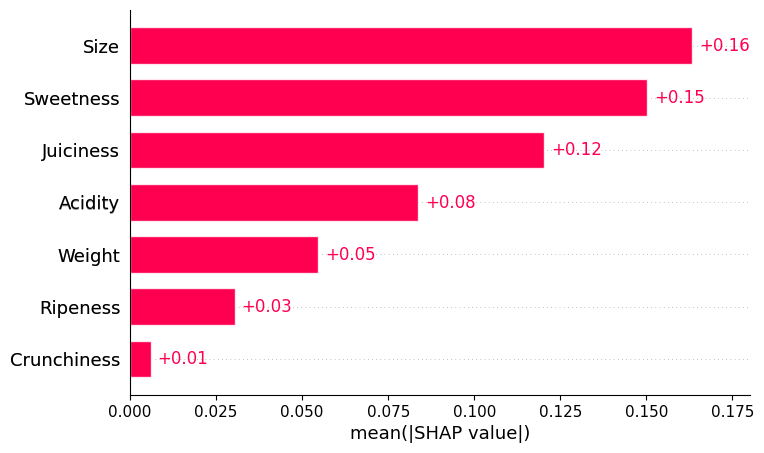

In [37]:
# Plotar a contribuição geral por Shap Values
shap.plots.bar(shap_values_class)

In [38]:
# Mostrar 1a instância do conjunto de testes
X_test.iloc[0, :]

Size           1.819744
Weight        -1.174086
Sweetness     -2.772288
Crunchiness   -0.039636
Juiciness     -1.437848
Ripeness       1.648811
Acidity       -1.098697
Name: 1150, dtype: float64

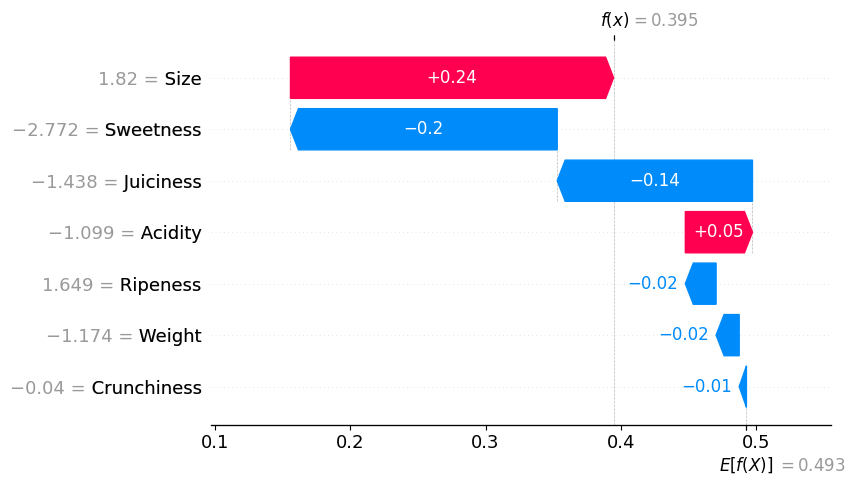

In [39]:
# Plotar os Shaps Values para um exemplo específico
shap.plots.waterfall(shap_values_class[0], max_display=13)

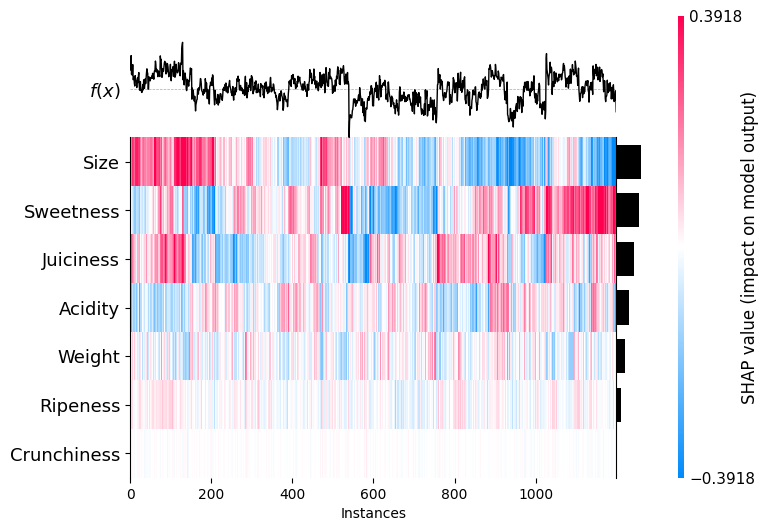

<Axes: xlabel='Instances'>

In [40]:
# Plotar Heatmap Geral
shap.plots.heatmap(shap_values_class, max_display=13)

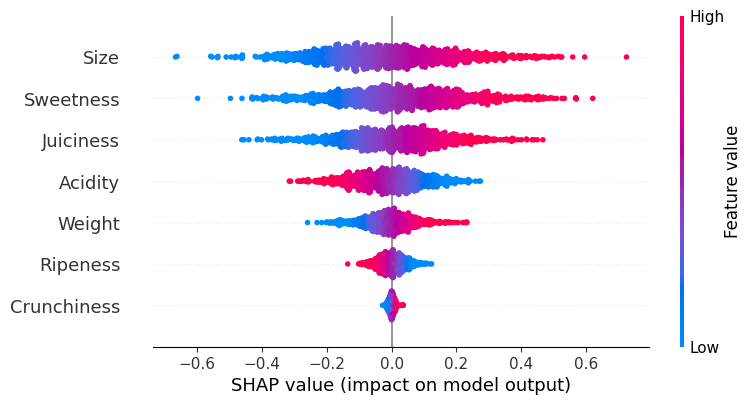

In [41]:
# Plot de Beewswarm Geral
shap.plots.beeswarm(shap_values_class, max_display=13)